# Relatório 1

## Lista de Tarefas

1. Analisar os tipos de dados e o número de registros do banco de dados.
2. Criar um banco com os registros nulos.
3. Retirar os registros nulos do banco.
4. Criar algum meio de visualização da quantidade de imoveis com o seu tipo.

## 1 - Análise do Data-base

In [1]:
# Importando as bibliotecas
import pandas as pd
import seaborn as sns

In [2]:
# Importando o database
# O separador padrão do csv é a ',' neste caso o database veio com a separação por ';'
# Foi usado o parametro sep = ';' para organização dos dados
dados = pd.read_csv('dbs/aluguel.csv', sep = ';')

In [3]:
dados.head()
# Os imoveis são dividos em seus tipos, bairro, quartos, vagas, suites, area, valor, condominio, iptu

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [4]:
# Análise do tipo dos dados
print('Tipos dos dados do banco de dados:')
print(dados.dtypes)
print('----------------------------------------------------------')
print('Quantidades dos tipos de dados da tabela:')
print(dados.dtypes.value_counts())

Tipos dos dados do banco de dados:
Tipo           object
Bairro         object
Quartos         int64
Vagas           int64
Suites          int64
Area            int64
Valor         float64
Condominio    float64
IPTU          float64
dtype: object
----------------------------------------------------------
Quantidades dos tipos de dados da tabela:
int64      4
float64    3
object     2
dtype: int64


In [5]:
# Quantidade de registros e registros nulos presentes na tabela
print('Quantidade de registros no banco:', dados.shape[0], '\nQuantidade de colunas no banco:', dados.shape[1])

Quantidade de registros no banco: 32960 
Quantidade de colunas no banco: 9


## 2 - Criando um Data Frame com os registros nulos

In [6]:
# Quais colunas tem registros nulos
qtd_dados_nulos = dados.isna().sum()
print('Colunas com registros nulos:')
print(qtd_dados_nulos)
print('----------------------------------------------------------')
# Quantidade de registros nulos presentes
qtd_dados_nulos = dados.isna().sum().sum()
# Criando um banco com todos os valores nulos
db_dados_nulos = dados[dados['IPTU'].isna() | dados['Valor'].isna() | dados['Condominio'].isna()]
# Conferindo se os registros nulos batem com o data-base de registros nulos
print('Quantidade de dados nulos no data-base:', qtd_dados_nulos, '\nQuantidade de dados nulos no data-base nulo criado:', db_dados_nulos.isna().sum().sum())

Colunas com registros nulos:
Tipo              0
Bairro            0
Quartos           0
Vagas             0
Suites            0
Area              0
Valor            17
Condominio     4093
IPTU          10237
dtype: int64
----------------------------------------------------------
Quantidade de dados nulos no data-base: 14347 
Quantidade de dados nulos no data-base nulo criado: 14347


In [7]:
# Visualização do dataframe de dados nulos
db_dados_nulos.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN


## 3 - Retirando valores nulos do Data-Base

In [8]:
# Para retirar os valores nulos do banco foi utilizado a função dropisna()
dados.dropna(inplace = True)
print('Quantidade de dados nulos presente no banco:', dados.isna().sum().sum())

Quantidade de dados nulos presente no banco: 0


## 4 - Mostrar os tipos de imoveis existentes

In [9]:
# Quantidade de imoveis que cada tipo possui
print(dados['Tipo'].value_counts())
aux = dados['Tipo'].value_counts()

Apartamento                    13950
Conjunto Comercial/Sala         4527
Casa de Condomínio               690
Loja/Salão                       549
Quitinete                        534
Flat                             395
Loja Shopping/ Ct Comercial      185
Casa                             112
Galpão/Depósito/Armazém           61
Casa de Vila                      60
Loft                              36
Casa Comercial                    25
Prédio Inteiro                    20
Box/Garagem                        5
Studio                             2
Terreno Padrão                     1
Name: Tipo, dtype: int64


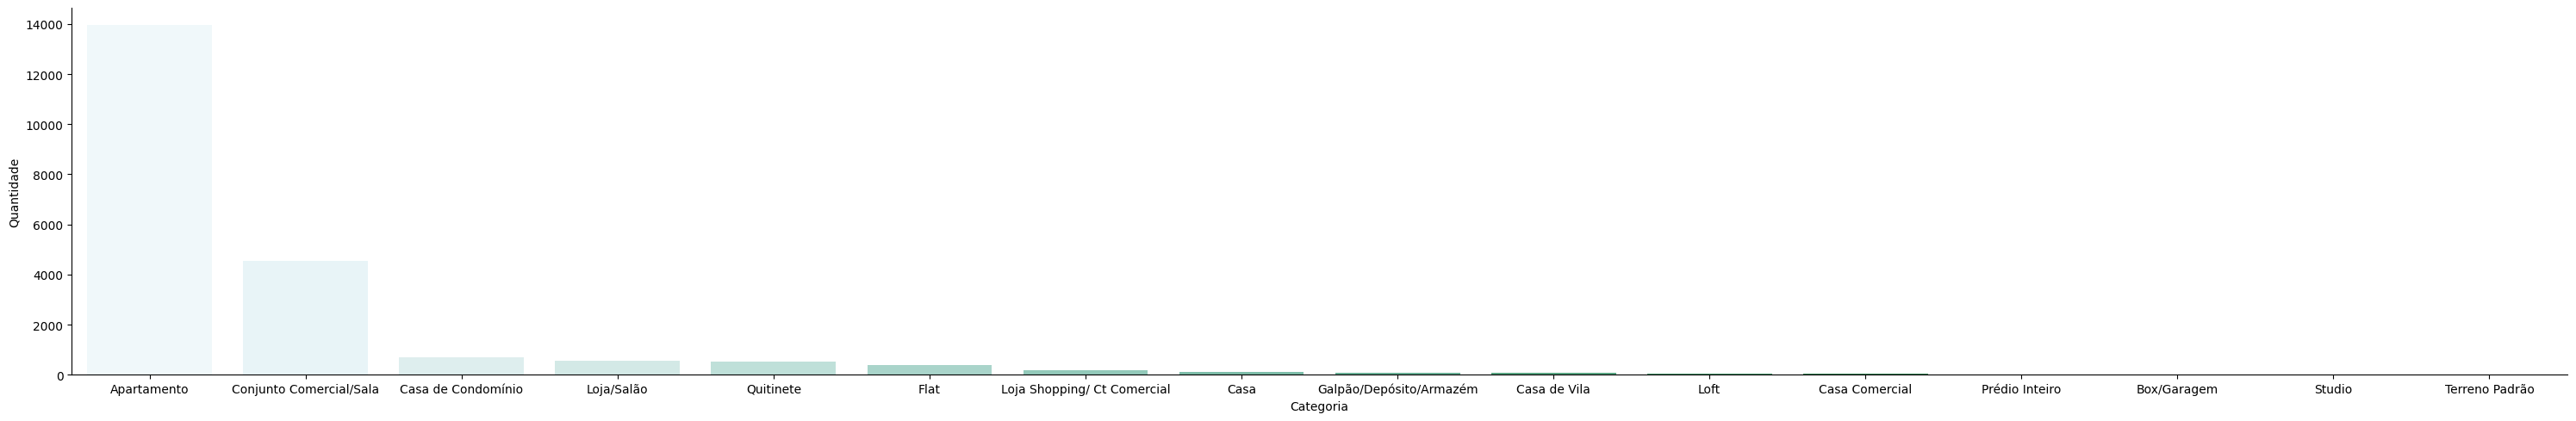

In [10]:
#Plotagem pelo seaborn
# usando o value counts index para fazer a order do menor pro maior
indice = dados['Tipo'].value_counts().index
plot_tipos = sns.catplot(x = 'Tipo', kind = 'count', data=dados, palette='BuGn', aspect=6, order = indice)
plot_tipos.set_ylabels('Quantidade')
plot_tipos.set_xlabels('Categoria')
plot_tipos.set_titles('Quantidade de imoveis por categoria')
plot_tipos = plot_tipos


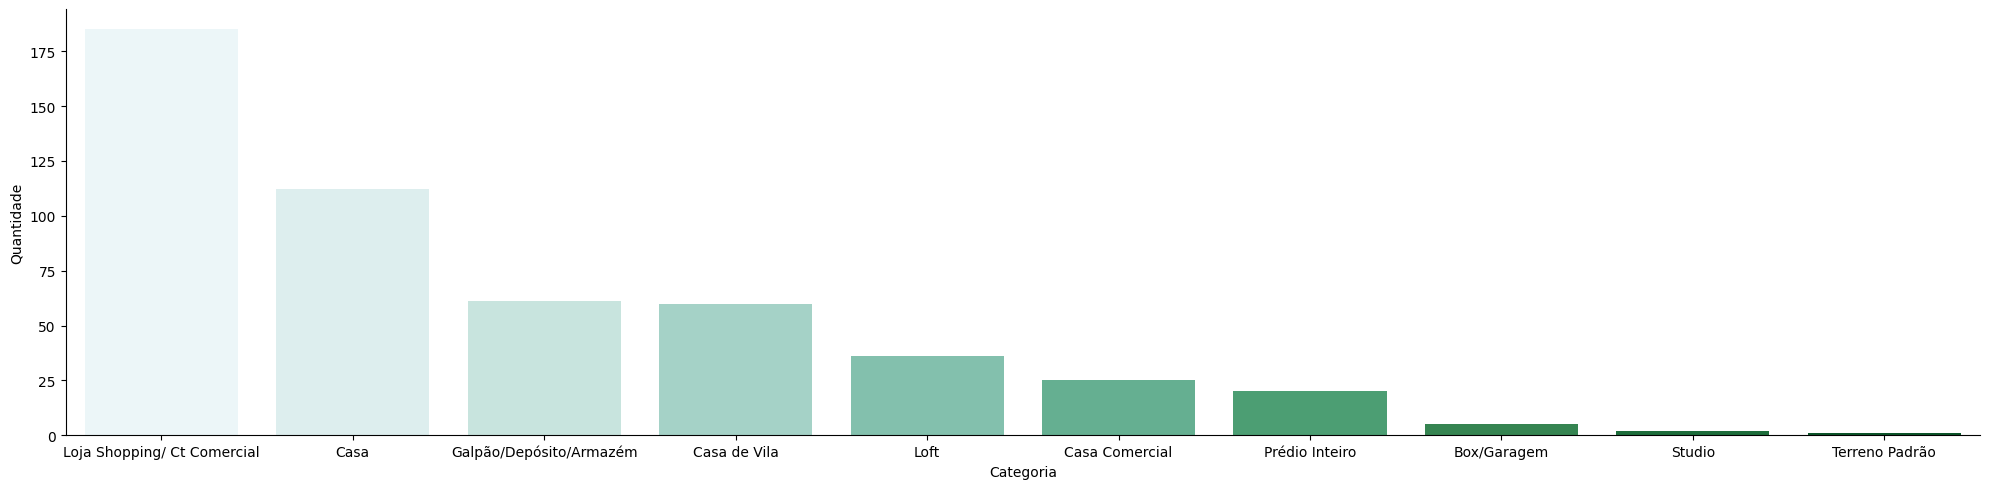

In [11]:
# Como a visualização do gráfico inteiro não foi boa, foi feito uma junção dos menores valores e criado um gráfico para as visualizações
# valores_menores recebe uma query com valores diferentes de apartamento, conjunto comercial, casa de condominio, lojas, quitinetes etc..
valores_menores = dados.query('Tipo != "Apartamento" and Tipo != "Conjunto Comercial/Sala" and Tipo != "Casa de Condomínio" and Tipo != "Loja/Salão" and Tipo != "Quitinete" and Tipo != "Flat" and Tipo != "Loja Shopping/Ct Comercial"')
# atualizado o valor do indice para a ordem da plotagem
indice = valores_menores['Tipo'].value_counts().index
# plotagem feita pelo seaborn alterando alguns valores padrões
plot_tipos = sns.catplot(x = 'Tipo', kind = 'count', data=valores_menores, palette='BuGn', aspect=4, order = indice)
plot_tipos.set_ylabels('Quantidade')
plot_tipos.set_xlabels('Categoria')
plot_tipos.set_titles('Quantidade de imoveis por categoria')
plot_tipos = plot_tipos


## 5 - Salvando os novos Data-Base

In [12]:
# Para salvar os novos bancos criados, é necessário ajustar os indices de ambos para um melhor entendimento do banco em tarefas futuras.
# Para ajustar os indices é usado a função reset_index() do pandas
db_dados_v2 = dados.reset_index(drop = True) # sem o parametro drop = True, é criado uma nova coluna com o indice antigo.
db_dados_v2.to_csv(r'dbs/alugueis_sem_dados_nulos', index = True) # o parametro index = True, escreve a coluna de indice no arquivo csv.
db_dados_nulos_v2 = db_dados_nulos.reset_index(drop = True)
db_dados_nulos_v2.to_csv(r'dbs/alugueis_dados_nulos', index = True)



## Conclusão

A base de dados tinha o seu separador como `';'`, como arquivos csv o padrão de separação é o `','` foi utilizado o parâmetro `'sep='` para a troca.  
Os tipos de dados foram float, object e int.  
A quantidade de linhas do banco é de 32960 e de colunas 9.    
No seus dados foram retirados os registros nulos e armazenados em um outro banco para registrar os valores que estão faltando. O total de dados nulos retirados foi de 14347.  
Para a criação do banco de dados nulos foi usado  a função `'isna()'` do pandas manipulando o banco de dados de acordo.  
Depois de armazenados os dados nulos foram retirados do banco, usando a função `'dropna(inplace = True)'`.  
Para a visualização gráfica dos tipos de imóveis foi utilizado a biblioteca seaborn com o método de plotagem de categorias.  